In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv("dataset_molecular_clean.csv")
print(df.shape)
df.head()


(3994, 21)


,pdb_id,chain_heavy,chain_light,variant_target,label,antibody_sequence,vh_len,vh_frac_gly,vh_frac_pro,vh_frac_aromatic,...,vl_len,vl_frac_gly,vl_frac_pro,vl_frac_aromatic,vl_frac_charged,ab_len,ab_frac_gly,ab_frac_pro,ab_frac_aromatic,ab_frac_charged
0,8J1T,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,DIQMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,SARS-CoV2_WT,1,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,115,0.121739,0.026087,0.104348,...,108,0.083333,0.055556,0.12037,0.12963,223,0.103139,0.040359,0.112108,0.147982
1,8J1T,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,DIQMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,SARS-CoV2_Alpha,1,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,115,0.121739,0.026087,0.104348,...,108,0.083333,0.055556,0.12037,0.12963,223,0.103139,0.040359,0.112108,0.147982
2,8J1T,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,DIQMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,SARS-CoV2_Beta,1,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,115,0.121739,0.026087,0.104348,...,108,0.083333,0.055556,0.12037,0.12963,223,0.103139,0.040359,0.112108,0.147982
3,8J1T,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,DIQMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,SARS-CoV2_Gamma,1,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,115,0.121739,0.026087,0.104348,...,108,0.083333,0.055556,0.12037,0.12963,223,0.103139,0.040359,0.112108,0.147982
4,8J1T,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,DIQMTQSPSFLSASVGDRVTITCRASQGISSYLAWYQQKPGKAPKL...,SARS-CoV2_Delta,1,VQLVESGGGLVQPGGSLRLSCAASGLTVSSNYMNWVRQAPGKGLEW...,115,0.121739,0.026087,0.104348,...,108,0.083333,0.055556,0.12037,0.12963,223,0.103139,0.040359,0.112108,0.147982


## Justificação da Escolha do Dataset

O dataset utilizado neste trabalho é baseado na base de dados CoV-AbDab, que reúne informação experimental sobre interações entre anticorpos humanos e variantes do SARS-CoV-2.

Este dataset foi selecionado por conter, simultaneamente, informação de sequência (cadeias VH e VL), dados de neutralização e referências estruturais através de identificadores PDB, permitindo uma abordagem integrada que liga a escala molecular à modelação preditiva.

Estas características tornam o dataset particularmente adequado ao objetivo do projeto, que visa explorar modelos de previsão com potencial integração em simulações epidemiológicas.


1 - Estatísticas gerais do dataset

In [2]:
n_samples = len(df)
n_pdbs = df["pdb_id"].nunique()
n_variants = df["variant_target"].nunique()

print(f"Nº de interações: {n_samples}")
print(f"Nº de PDBs únicos: {n_pdbs}")
print(f"Nº de variantes únicas: {n_variants}")


Nº de interações: 3994
Nº de PDBs únicos: 472
Nº de variantes únicas: 94


2 - Estatísticas descritivas das features numéricas

In [16]:
stats = df.select_dtypes(include=[np.number]).describe().T
stats


,count,mean,std,min,25%,50%,75%,max
label,3994.0,0.639209,0.480290,0.000000,0.000000,1.000000,1.000000,1.000000
vh_len,3994.0,122.539059,5.287156,113.000000,119.000000,122.000000,126.000000,226.000000
vh_frac_gly,3994.0,0.107520,0.018381,0.062500,0.096000,0.109244,0.120000,0.158333
vh_frac_pro,3994.0,0.028975,0.011506,0.015152,0.017391,0.025000,0.033898,0.076336
vh_frac_aromatic,3994.0,0.121405,0.018145,0.071006,0.105691,0.119658,0.136000,0.178295
vh_frac_charged,3994.0,0.172395,0.020922,0.121739,0.161017,0.170732,0.185484,0.243902
vl_len,3994.0,108.567101,3.061786,100.000000,107.000000,108.000000,110.000000,215.000000
vl_frac_gly,3994.0,0.097210,0.018174,0.060465,0.083333,0.093458,0.110092,0.137615
vl_frac_pro,3994.0,0.059115,0.009730,0.028037,0.055046,0.056075,0.064815,0.090909
vl_frac_aromatic,3994.0,0.101679,0.013253,0.046729,0.092593,0.102804,0.111111,0.141509


A análise estatística revela diferenças significativas de escala entre as várias features numéricas, nomeadamente nos comprimentos das sequências. 
Este facto motiva a necessidade de normalização em modelos sensíveis à escala das variáveis.


3 - Verificação de qualidade dos dados

In [18]:
# Verificação de valores em falta
df.isna().sum()


pdb_id               0
chain_heavy          0
chain_light          0
variant_target       0
label                0
antibody_sequence    0
vh_len               0
vh_frac_gly          0
vh_frac_pro          0
vh_frac_aromatic     0
vh_frac_charged      0
vl_len               0
vl_frac_gly          0
vl_frac_pro          0
vl_frac_aromatic     0
vl_frac_charged      0
ab_len               0
ab_frac_gly          0
ab_frac_pro          0
ab_frac_aromatic     0
ab_frac_charged      0
dtype: int64

In [19]:
# Verificação de duplicados
df.duplicated().sum()


0

Após o processo de curadoria, não se observam valores em falta relevantes nem duplicados que comprometam a análise.
Isto indica que o dataset se encontra adequado para as etapas de modelação subsequentes.


4 - Distribuição das classes (label)

,count,proportion
label,,
0,1441,0.360791
1,2553,0.639209


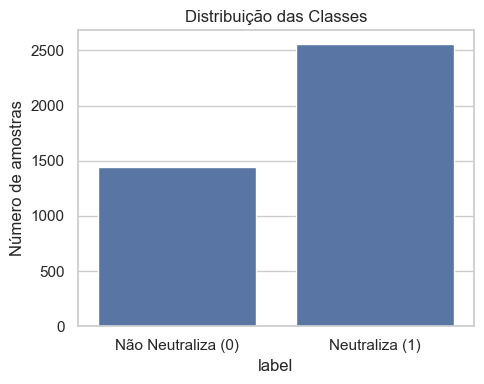

In [3]:
label_counts = df["label"].value_counts().sort_index()
label_props = df["label"].value_counts(normalize=True).sort_index()

display(pd.DataFrame({
    "count": label_counts,
    "proportion": label_props
}))

#Gráfico de Barras
plt.figure(figsize=(5,4))
sns.barplot(x=label_counts.index, y=label_counts.values)
plt.xticks([0,1], ["Não Neutraliza (0)", "Neutraliza (1)"])
plt.ylabel("Número de amostras")
plt.title("Distribuição das Classes")
plt.tight_layout()
plt.show()


Observa-se um desbalanceamento moderado entre classes, com maior número de interações neutralizantes.
Este facto justifica a utilização de métricas de avaliação robustas a desbalanceamento, como AUC-ROC e F1-score.


5 - Distribuição do nº de interações por PDB (risco de leakage)

count    472.000000
mean       8.461864
std        8.214910
min        1.000000
25%        1.000000
50%        6.000000
75%       11.000000
max       51.000000
Name: count, dtype: float64

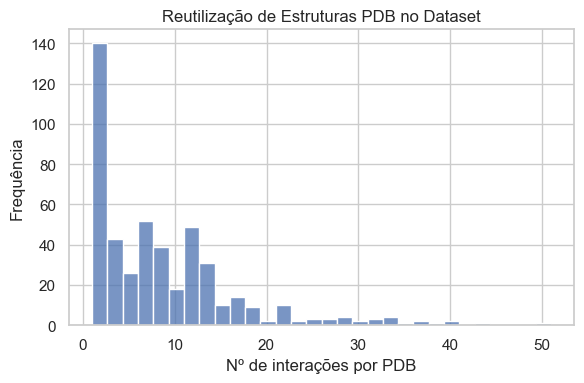

In [4]:
pdb_counts = df["pdb_id"].value_counts()

display(pdb_counts.describe())

#Histograma do número de amostras por PDB
plt.figure(figsize=(6,4))
sns.histplot(pdb_counts, bins=30)
plt.xlabel("Nº de interações por PDB")
plt.ylabel("Frequência")
plt.title("Reutilização de Estruturas PDB no Dataset")
plt.tight_layout()
plt.show()


A análise mostra que várias estruturas PDB estão associadas a múltiplas interações no dataset.
Isto indica dependência entre observações, tornando inadequado um particionamento aleatório clássico.

Por este motivo, a validação dos modelos é realizada com base em grupos definidos pelo `pdb_id`, de forma a evitar data leakage estrutural.


6 - Correlação entre features

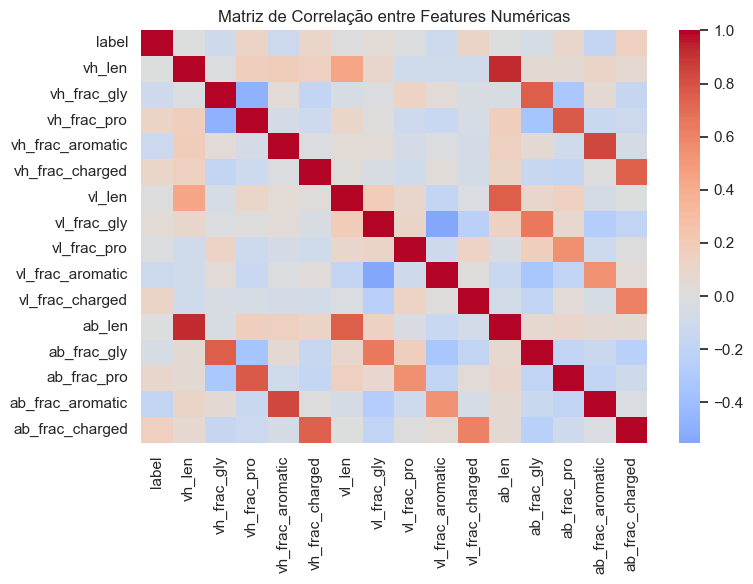

In [20]:
corr = df.select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação entre Features Numéricas")
plt.tight_layout()
plt.show()


Observam-se correlações elevadas entre algumas variáveis relacionadas com o comprimento das sequências, sugerindo redundância parcial.
Esta observação é relevante para a escolha de modelos e para a eventual aplicação de técnicas de regularização ou redução de dimensionalidade.


7 - Comprimento das sequências

,vh_len,vl_len,ab_len
count,3994.000000,3994.000000,3994.000000
mean,122.539059,108.567101,231.106159
std,5.287156,3.061786,7.177144
min,113.000000,100.000000,218.000000
25%,119.000000,107.000000,227.000000
50%,122.000000,108.000000,231.000000
75%,126.000000,110.000000,234.000000
max,226.000000,215.000000,441.000000


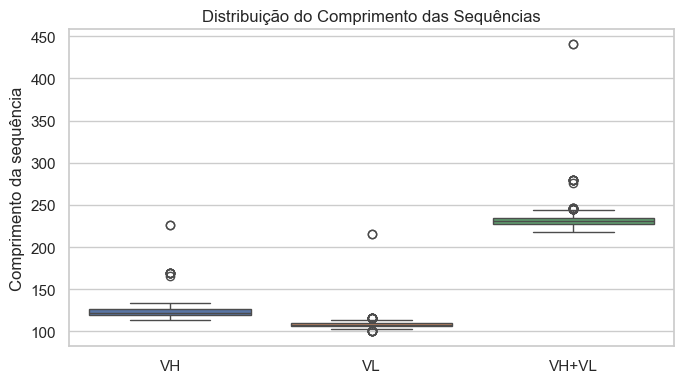

In [5]:
length_stats = df[["vh_len", "vl_len", "ab_len"]].describe()
display(length_stats)

#Boxplots dos comprimentos
plt.figure(figsize=(7,4))
sns.boxplot(data=df[["vh_len", "vl_len", "ab_len"]])
plt.xticks([0,1,2], ["VH", "VL", "VH+VL"])
plt.ylabel("Comprimento da sequência")
plt.title("Distribuição do Comprimento das Sequências")
plt.tight_layout()
plt.show()


8 - Frequência das variantes mais comuns

variant_target
SARS-CoV2_WT                  459
SARS-CoV2_Omicron-BA1         277
SARS-CoV2_Delta               262
SARS-CoV2_Omicron-BA2         249
SARS-CoV2_Beta                214
SARS-CoV2_Alpha               191
SARS-CoV2_Omicron-BA4/5       185
SARS-CoV2_Omicron-BA2.12.1    178
SARS-CoV2_Omicron-BA1.1       171
SARS-CoV2_Gamma               160
Name: count, dtype: int64

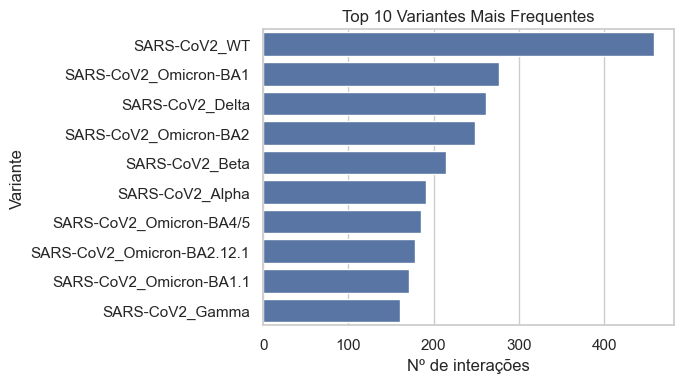

In [6]:
top_variants = df["variant_target"].value_counts().head(10)

display(top_variants)

#Gráfico de Barras das Top 10 Variantes
plt.figure(figsize=(7,4))
sns.barplot(y=top_variants.index, x=top_variants.values)
plt.xlabel("Nº de interações")
plt.ylabel("Variante")
plt.title("Top 10 Variantes Mais Frequentes")
plt.tight_layout()
plt.show()


A distribuição desigual de variantes reforça a necessidade de validação robusta e análise cuidadosa de generalização.

A validação cruzada baseada em grupos garante que nenhuma estrutura anticorpo é observada simultaneamente nos conjuntos de treino e teste, prevenindo data leakage estrutural.

9 - Implicações para a modelação (ligação explícita EDA → decisões)

A análise exploratória suporta diretamente decisões metodológicas:

- **Validação**: devido à reutilização de estruturas, deve-se usar *GroupKFold* por `pdb_id` para evitar *data leakage*.  
- **Métricas**: perante possível desbalanceamento, usar AUC-ROC e F1-score (para além de accuracy).  
- **Pré-processamento**: diferenças de escala podem justificar normalização em modelos que dependem da escala.  
- **Robustez/Reprodutibilidade**: registar versões finais do dataset e garantir que o notebook executa do topo ao fim.

10.1 - Criação de Splits Fixos (Train / Validation / Test)


In [22]:
import numpy as np
import pandas as pd

DATASET_PATH = "dataset_molecular_clean.csv"  # ou dataset_molecular_gnn_ready.csv
df = pd.read_csv(DATASET_PATH)
df["pdb_id"] = df["pdb_id"].astype(str).str.upper()

def make_group_splits(df, group_col="pdb_id", train_frac=0.7, val_frac=0.15, test_frac=0.15, seed=42):
    assert abs(train_frac + val_frac + test_frac - 1.0) < 1e-9
    rng = np.random.default_rng(seed)

    groups = df[group_col].unique()
    rng.shuffle(groups)

    n = len(groups)
    n_train = int(round(train_frac * n))
    n_val = int(round(val_frac * n))

    g_train = set(groups[:n_train])
    g_val   = set(groups[n_train:n_train+n_val])
    g_test  = set(groups[n_train+n_val:])

    idx_train = df.index[df[group_col].isin(g_train)].to_numpy()
    idx_val   = df.index[df[group_col].isin(g_val)].to_numpy()
    idx_test  = df.index[df[group_col].isin(g_test)].to_numpy()

    # sanity: sem overlap
    assert len(set(df.loc[idx_train, group_col]) & set(df.loc[idx_val, group_col])) == 0
    assert len(set(df.loc[idx_train, group_col]) & set(df.loc[idx_test, group_col])) == 0
    assert len(set(df.loc[idx_val, group_col]) & set(df.loc[idx_test, group_col])) == 0

    return idx_train, idx_val, idx_test

idx_train, idx_val, idx_test = make_group_splits(df)

np.savez("splits_grouped.npz", train=idx_train, val=idx_val, test=idx_test)
df.iloc[idx_train].to_csv("train_grouped.csv", index=False)
df.iloc[idx_val].to_csv("val_grouped.csv", index=False)
df.iloc[idx_test].to_csv("test_grouped.csv", index=False)

print("Guardado: splits_grouped.npz + train_grouped.csv / val_grouped.csv / test_grouped.csv")
print("Sizes:", len(idx_train), len(idx_val), len(idx_test), "| PDBs:", df["pdb_id"].nunique())


Guardado: splits_grouped.npz + train_grouped.csv / val_grouped.csv / test_grouped.csv
Sizes: 2789 562 643 | PDBs: 472


10.2 - Modelo de Sequência Baseado em k-mers (GroupKFold)


In [23]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GroupKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

DATASET_PATH = "dataset_molecular_clean.csv"  # recomendável para sequência
df = pd.read_csv(DATASET_PATH)
df["pdb_id"] = df["pdb_id"].astype(str).str.upper()
df["antibody_sequence"] = df["antibody_sequence"].astype(str).str.upper()
y = df["label"].astype(int).values
groups = df["pdb_id"].values

# prepara sequência para n-gramas
seq = df["antibody_sequence"].apply(lambda s: " ".join(list(s)))

pipe = Pipeline([
    ("vect", CountVectorizer(
        analyzer="char_wb",
        ngram_range=(3, 5),   # 3-mers a 5-mers
        min_df=2
    )),
    ("clf", LogisticRegression(
        max_iter=4000,
        class_weight="balanced"
    ))
])

gkf = GroupKFold(n_splits=5)
metrics = {"auc": [], "acc": [], "f1": []}

for fold, (tr, te) in enumerate(gkf.split(seq, y, groups)):
    pipe.fit(seq.iloc[tr], y[tr])
    p = pipe.predict_proba(seq.iloc[te])[:, 1]
    y_hat = (p >= 0.5).astype(int)

    auc = roc_auc_score(y[te], p) if len(np.unique(y[te])) > 1 else np.nan
    acc = accuracy_score(y[te], y_hat)
    f1 = f1_score(y[te], y_hat, zero_division=0)

    metrics["auc"].append(auc)
    metrics["acc"].append(acc)
    metrics["f1"].append(f1)

    print(f"Fold {fold}: AUC={auc:.3f} | Acc={acc:.3f} | F1={f1:.3f}")

print("\nMédia ± std")
for k, v in metrics.items():
    print(f"{k}: {np.nanmean(v):.3f} ± {np.nanstd(v):.3f}")


Fold 0: AUC=0.619 | Acc=0.543 | F1=0.533
Fold 1: AUC=0.744 | Acc=0.692 | F1=0.752
Fold 2: AUC=0.635 | Acc=0.584 | F1=0.634
Fold 3: AUC=0.700 | Acc=0.597 | F1=0.645
Fold 4: AUC=0.581 | Acc=0.550 | F1=0.582

Média ± std
auc: 0.656 ± 0.059
acc: 0.593 ± 0.053
f1: 0.629 ± 0.073


10.3 - Treino Final com Splits Fixos


In [24]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score

train_df = pd.read_csv("train_grouped.csv")
val_df   = pd.read_csv("val_grouped.csv")
test_df  = pd.read_csv("test_grouped.csv")

def prep_seq(df):
    return df["antibody_sequence"].astype(str).str.upper().apply(lambda s: " ".join(list(s)))

X_train, y_train = prep_seq(train_df), train_df["label"].astype(int).values
X_val, y_val     = prep_seq(val_df),   val_df["label"].astype(int).values
X_test, y_test   = prep_seq(test_df),  test_df["label"].astype(int).values

pipe = Pipeline([
    ("vect", CountVectorizer(analyzer="char_wb", ngram_range=(3, 5), min_df=2)),
    ("clf", LogisticRegression(max_iter=4000, class_weight="balanced"))
])

pipe.fit(X_train, y_train)

def eval_set(name, X, y):
    p = pipe.predict_proba(X)[:, 1]
    y_hat = (p >= 0.5).astype(int)
    auc = roc_auc_score(y, p) if len(np.unique(y)) > 1 else np.nan
    acc = accuracy_score(y, y_hat)
    f1 = f1_score(y, y_hat, zero_division=0)
    print(f"{name}: AUC={auc:.3f} | Acc={acc:.3f} | F1={f1:.3f}")

eval_set("VAL", X_val, y_val)
eval_set("TEST", X_test, y_test)


VAL: AUC=0.684 | Acc=0.637 | F1=0.690
TEST: AUC=0.665 | Acc=0.667 | F1=0.730


Nota: Devido a limitações de compatibilidade do PyTorch no ambiente Windows,
os modelos baseados em Transformers foram substituídos por uma abordagem de
sequência baseada em k-mers, mantendo validação por grupos e evitando data leakage.
